# Лабораторна робота №7

To perform this laboratory work, we will first create a `GeneticAlgorithm` class, which will contain the following methods:

- `generate_population` to generate the initial population
- `calculate_y_values` to calculate the values ​​of the y function
- `select` to select an individual for mating
- `crossover` to create offspring
- `mutate` to generate a random mutation with a small probability
- `main_cycle` to execute the main cycle of the genetic algorithm

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, function, variables_number, bounds, max_search=True, generations_number=100, individuals_number=10):
        self.function = function
        self.variables = variables_number
        self.bounds = bounds
        self.max_search = max_search
        self.generations_number = generations_number
        self.individuals_number = individuals_number

    def generate_population(self):
        return [[random.uniform(*bound) for bound in self.bounds] for _ in range(self.individuals_number)]
    
    def calculate_y_values(self, individual):
        return self.function(*individual)
    
    def select(self, population):
        selected_y = [self.calculate_y_values(individual) for individual in population]
        if self.max_search:
            return max(zip(population, selected_y), key=lambda x: x[1])[0]
        else:
            return min(zip(population, selected_y), key=lambda x: x[1])[0]
        
    def crossover(self, parent_one, parent_two):
        child = []
        for i in range(self.variables):
            if random.random() < 0.5:
                child.append(parent_one[i])
            else:
                child.append(parent_two[i])
        return child
    
    def mutate(self, chromosome):
        for i in range(self.variables):
            if random.random() < 0.01:
                chromosome[i] = random.uniform(*self.bounds[i])
        return chromosome
    
    def main_cycle(self):
        population = self.generate_population()
        for _ in range(self.generations_number):
            offspring = []
            for _ in range(self.individuals_number):
                parent_one = self.select(population)
                parent_two = self.select(population)
                child = self.crossover(parent_one, parent_two)
                child = self.mutate(child)
                offspring.append(child)
            population = offspring
        return self.select(population)
    

Now let's create functions and derive the corresponding maximum and minimum values ​​for them

In [2]:
def one_variable_function(x):
    return np.sin((x-2)/2) * x * np.sin(x-3)

def two_variable_function(x, y):
    return np.cos(y + x / 2)

x = np.linspace(-10, 10, 400) # one_variable_function
y_values = one_variable_function(x)

y = np.linspace(-10, 10, 400) # two_variable_function
X, Y = np.meshgrid(x, y)
Z = two_variable_function(X, Y)

minFunc1 = np.min(y_values) # use this value for comparison with the results obtained from the genetic algorithm
maxFunc2 = np.max(Z)

# Find the minimum for the first function
genetic1 = GeneticAlgorithm(one_variable_function, variables_number=1, bounds=[(-10, 10)], max_search=False)
findMin = genetic1.main_cycle()
print(f"Minimum for the first function: (x = {findMin}, y = {one_variable_function(*findMin)})")
print(f"Actual y value: {minFunc1}")

# Find the maximum for the second function
genetic2 = GeneticAlgorithm(two_variable_function, variables_number=2, bounds=[(-10, 10), (-10, 10)])
findMax = genetic2.main_cycle()
print(f"Maximum for the second function (x = {findMax}, z = {two_variable_function(*findMax)})")
print(f"Actual Z value: {maxFunc2}")


Minimum for the first function: (x = [-8.173147557622574], y = -7.487986143574158)
Actual y value: -7.672246052870277
Maximum for the second function (x = [-4.374144536694329, 8.387660241906346], z = 0.9965907791335801)
Actual Z value: 0.9999967444372527


To visualize the results, we will also build graphs:

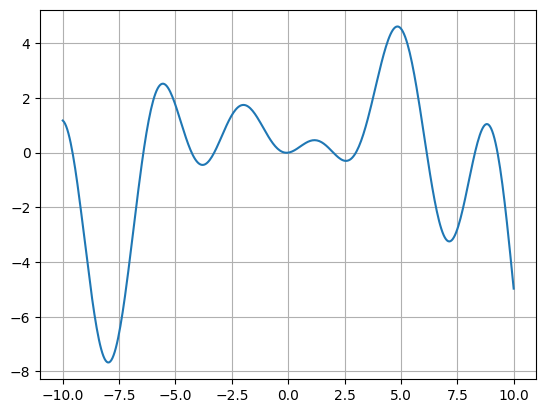

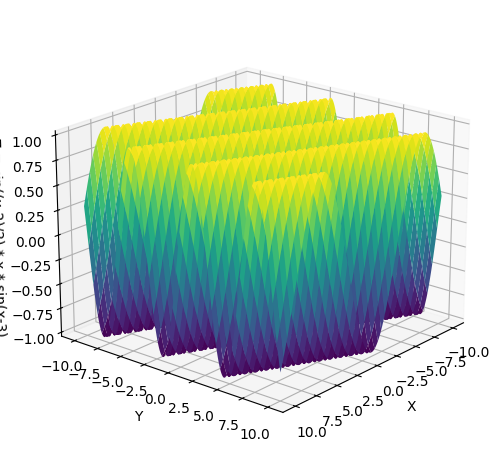

In [3]:
plt.plot(x, one_variable_function(x))
plt.grid()
plt.show()

ax = plt.subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z = sin((x-2)/2) * x * sin(x-3)')
ax.view_init(azim=40, elev=20)
plt.tight_layout()
plt.show()